# Plot exp growth example

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

import numpy as np
import scipy.optimize

In [5]:
df = pd.DataFrame()
data = [
    [0, 720],
    [1, 52488],
    [2, 7456106]
]

df = pd.DataFrame(data, columns=["Generation", "Compounds"])

R² = 0.9999981514719588
1.7858965565246374 -4.10441251042724


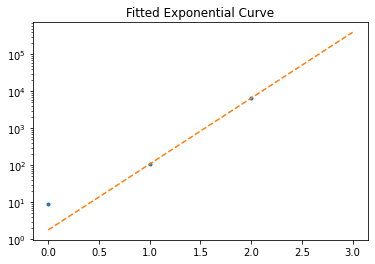

In [7]:

Polynomial = np.polynomial.Polynomial


def monoExp(x, a, b):
    return a*np.exp(-b*x)

data = [
    [0, 720],
    [1, 52488],
    [2, 7456106]
]

xs = np.array([0, 1, 2])
ys = np.array([i[1] for i in data])
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, (100, 0))

a, b = params

squaredDiffs = np.square(ys - monoExp(xs, a, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(np.array([i/10 for i in range(31)]), monoExp(np.array([i/10 for i in range(31)]), a, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")
print(a, b)

ax = plt.gca()
ax.set_yscale("log")
# a = 653
pred_df = pd.DataFrame(zip(np.array([i/10 for i in range(31)]), monoExp(np.array([i/10 for i in range(31)]), a, b)), columns=["Generation", "Compounds"])

In [4]:
from matplotlib import rcParams
params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 10,
   'legend.title_fontsize': 12,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
   }
rcParams.update(params)
# sns.set_palette("pastel")

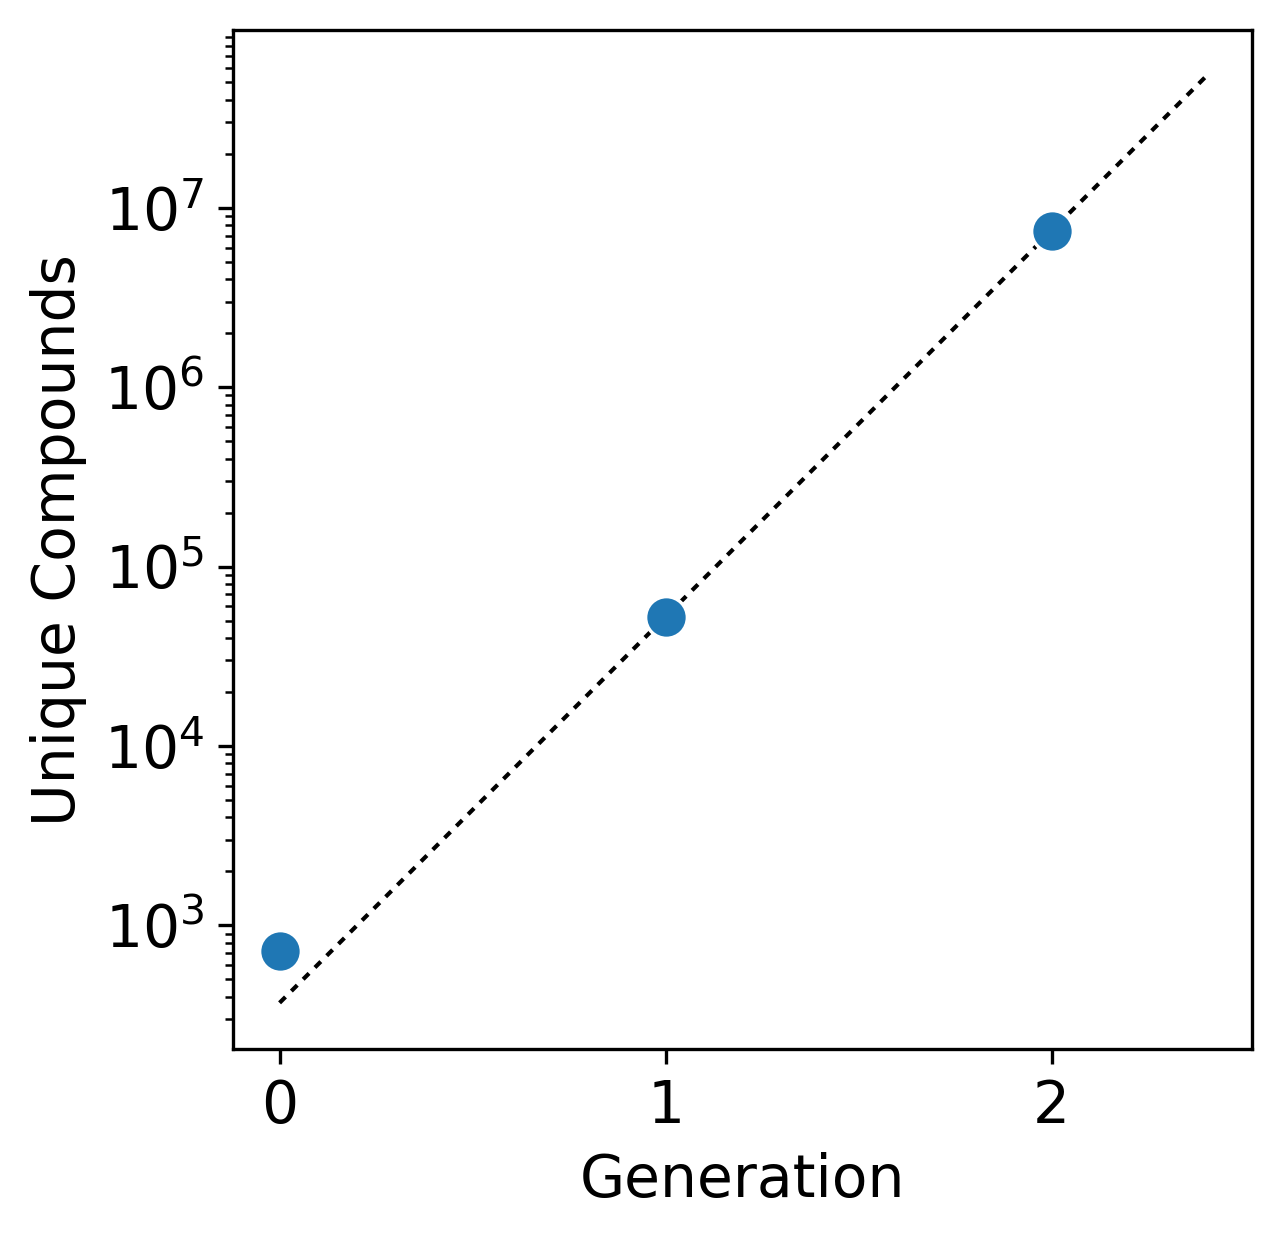

In [7]:
r = 25
pred_df = pd.DataFrame(zip(np.array([i/10 for i in range(r)]), monoExp(np.array([i/10 for i in range(r)]), a, b)), columns=["Generation", "Compounds"])
fig, axs = plt.subplots(1, 1, dpi=300)

lplot = sns.lineplot(x="Generation", y="Compounds", data=pred_df, color='black', style=True, dashes=[(2,2)], linewidth=1, legend=False)
splot = sns.scatterplot(x="Generation", y="Compounds", data=df, ax=axs, s=100, zorder=4)

axs.set_ylabel("Unique Compounds")


axs.set_yscale("log")
axs.set_aspect(1./axs.get_data_ratio())

fig.savefig("../figures/fig_3_exponential_growth.png", bbox_inches="tight")